<a href="https://colab.research.google.com/github/htcysl/Machine-Learning-/blob/main/Non_parametric_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-parametric Methods
Non-parametric methods, also known as distribution-free, are a class of statistical techniques that do not specific assumptions about the underlying probability distribution of the data. Unlike parametric methods, which make assumptions about the shape or parameters of the data distribution (e.g. normal distribution), non-parametric methods are more flexible and robust. They are commonly used when you have limited knowledge about the data distribution or when the data does not meet the assumptions of parametric methods.

Here are some ccommon non-parametric methods and their applications :
1. Ranking and Order Statistics:
   * Rank Sum Test(Mann-Whitney U test)
   * Wilcoxon Signed-Rank Test
   * Kendall's Tau and Spearman' Rank Correlation
2. Kernal Density Estimation(KDE)
3. Resampling Methods
   * Bootstrap
   * Permutation Test
4. Kernel Smoothing
   * Kernel Regression (Kernel Least Square)
   * Kernel Density Estimation(KDE)
5. Non-Parmetric Regression
   * Local Regression
6. Nearest Neighbor Methods
   * k-Nearest Neighbors(k-NN)
   * Locally weighted scatterplot smoothing.
7. Sign Test
8. Time Series Decomposition


For this lab session I used below link: </p>
<a href="https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/"> K-nearest Neighbors (KNN) Classification Model </a>

Load Iris data and extract input as X and output as y <br>
See https://archive.ics.uci.edu/dataset/53/iris

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

Use pandas library to investigate data

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


Let's see how many examples we have of each species as well as the data type for each species

In [3]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Import plotting library

In [4]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

In [5]:
import seaborn as sns

sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

Lets visualise iris data

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

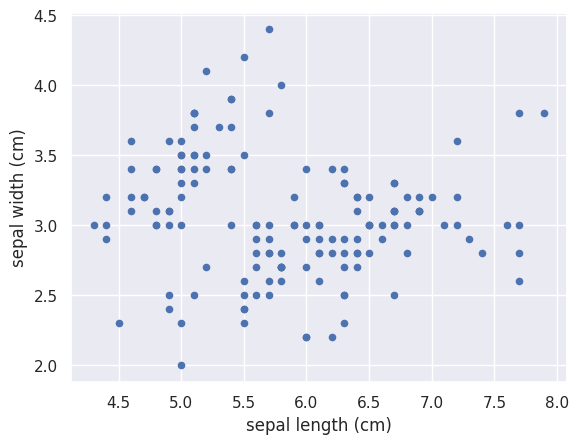

In [6]:
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

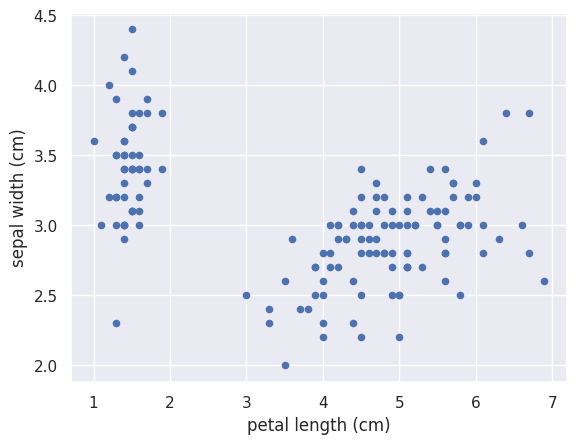

In [7]:
df.plot(kind="scatter", x="petal length (cm)", y="sepal width (cm)")

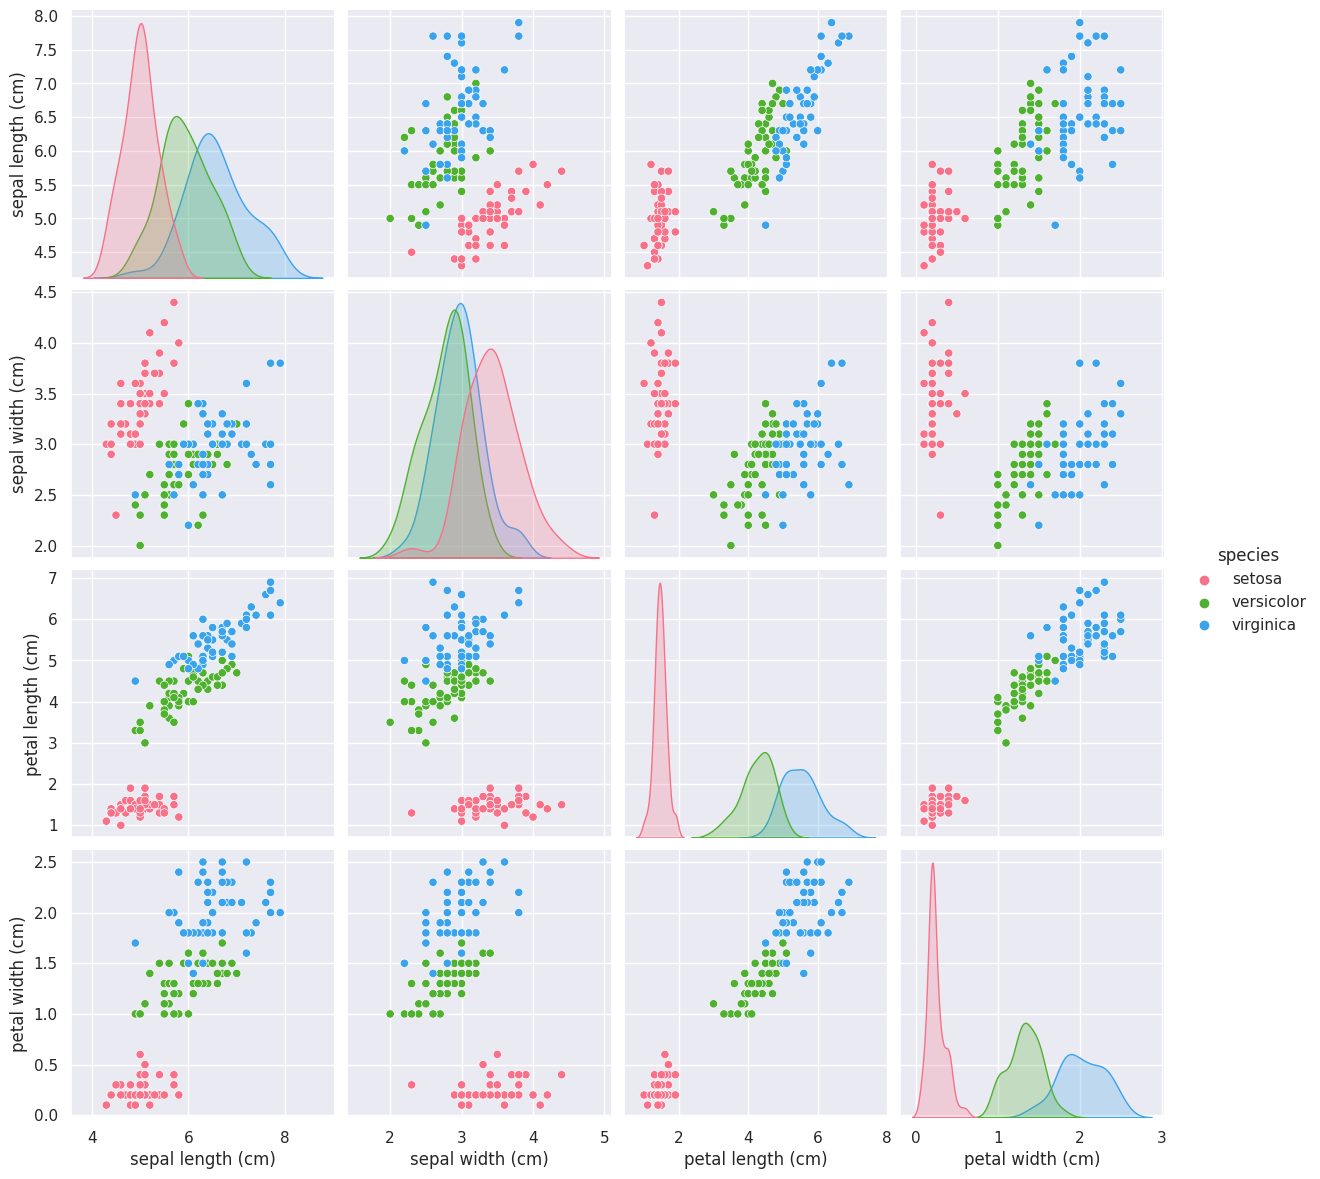

In [8]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sns.pairplot(df, x_vars=columns, y_vars=columns, hue="species", palette="husl", size=3)

Create X (features) and y (response)

In [9]:
X = iris.data
y = iris.target

In [10]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Import kNN Classifier from Scikitlearn and also import metrics to measure peformance of the trained classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Train the KNN classifier on X and y using K=5

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

Calculate the classifier performance on the training data (X),  KNN use K=5

In [14]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


Lets train the KNN classifier with K=1

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

Calculate the classifier performance on the training data (X),  KNN use K=1

In [16]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


Recall what we talked in the lecture, in KNN error is zero (hence accuracy is 1.0 meaning 100%) if you use training data as test data and K=1

print the shapes of X and y </p>
X is our features matrix with 150 x 4 dimension

In [17]:
print(X.shape)

(150, 4)


y is our response vector with 150 x 1 dimension

In [18]:
print(y.shape)

(150,)


Using training data as test data is a terrible idea. So, lets divide our data (X) as training and test data

STEP 1: split X and y into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

print the shapes of the new X objects

In [20]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


print the shapes of the new y objects

In [21]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [22]:
X_train

array([[4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5. , 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.6, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 3.6, 1.4, 0.1],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [7.1, 3. , 5.9, 2.1],
       [5.5, 3.5, 1.3, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [5.5, 2.3, 4. , 1.3],
       [6.9, 3.1, 5.4, 2.1],
       [5.8, 2.7, 3.9, 1.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 2.8, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 3.4, 5.4, 2.3],
       [5.7, 2.8, 4.1, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [5.8, 2

In [23]:
y_train

array([0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1,
       2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0,
       0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2])

In [24]:
X_test

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2

In [25]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1])

Train KNN with K=5 on this training data

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

And now test the trained classifier on test data

In [27]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Now lets try different K values (while we train on train data and test on test data)

In [28]:
# try K=1 through K=26 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
train_scores = []
test_scores = []
train_error = []
test_error = []
modelComplexity = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_train)
    trainAccuracy = metrics.accuracy_score(y_train, y_pred)
    train_scores.append(trainAccuracy)
    train_error.append(1 - trainAccuracy)

    y_pred = knn.predict(X_test)
    testAccuracy = metrics.accuracy_score(y_test, y_pred)
    test_scores.append(testAccuracy)
    test_error.append(1 - testAccuracy)

    modelComplexity.append(1.0 / k)

Plot the relationship between model complexity (1/K) and testing misclassification

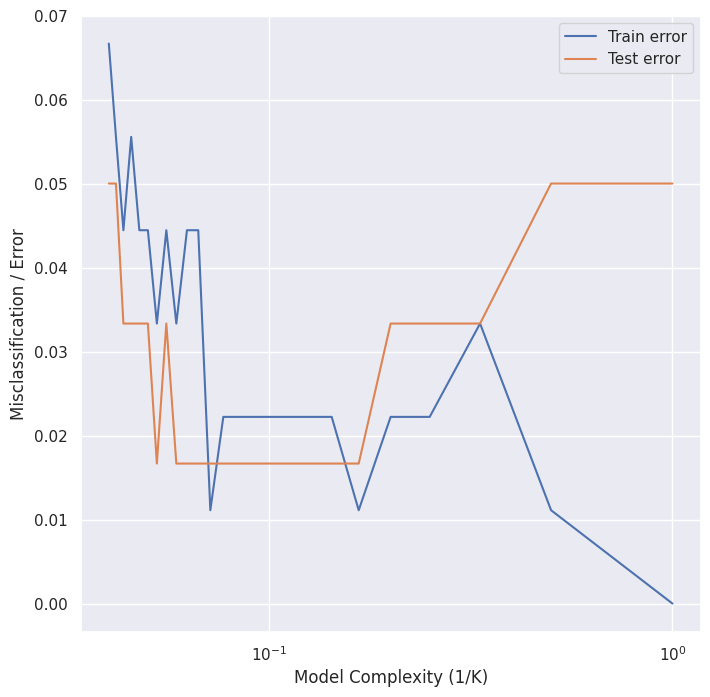

In [29]:
plt.figure(figsize=(8,8))
plt.plot(modelComplexity, train_error)
plt.plot(modelComplexity, test_error)
plt.xlabel('Model Complexity (1/K)')
plt.ylabel('Misclassification / Error')
plt.legend(["Train error", "Test error"], loc ="upper right")
plt.xscale('log')
plt.show()

Plot the relationship between K and testing accuracy

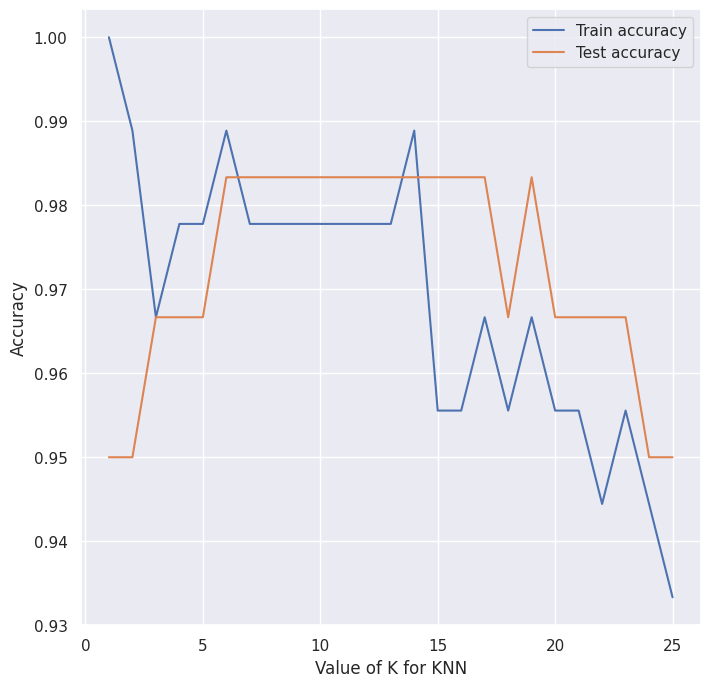

In [30]:
plt.figure(figsize=(8,8))
plt.plot(k_range, train_scores)
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend(["Train accuracy", "Test accuracy"], loc ="upper right")
plt.show()

Instantiate the model with the best known parameters (you can find best K automatically with a couple of lines of codes)

In [31]:
knn = KNeighborsClassifier(n_neighbors=11)

Train the model with X and y (not X_train and y_train)

In [32]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

Show the test performance

In [33]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


Make 3 predictions for an out-of-sample observation

In [34]:
knn.predict([[3, 5, 4, 2], [1, 1, 1, 1], [1, 2, 3, 4], [6, 3, 5, 2], [1, 3, 5, 2]])

array([1, 0, 1, 2, 1])